# Apresentação dos gráficos SSVEP

Após a organização e gravação dos dados no objeto MNE, vamos carrgalo novamente para filtrar e apresentar os dados.

In [2]:
# carregamento dos dados

import mne
epochs = mne.read_epochs('ssvep-epo.fif')

Reading c:\Users\eduar\OneDrive\Documentos\7° periodo-CM\Interfaces Não Convencionais\atvssvep\src\ssvep-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...   15998.05 ms
        0 CTF compensation matrices available
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
# filtragem dos dados
epochs = epochs.filter(1, 30).copy()

Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (3.303 s)

<EpochsFIF | 10 events (all good), 0 – 15.998 s (baseline off), ~646 kB, data loaded,
 '6': 5
 '6.5': 1
 '7': 1
 '7.5': 1
 '8.2': 1
 '9.3': 1>


<EpochsFIF | 10 events (all good), 0 – 15.998 s (baseline off), ~646 kB, data loaded,
 '6': 5
 '6.5': 1
 '7': 1
 '7.5': 1
 '8.2': 1
 '9.3': 1>
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\eduar\AppData\Local\Temp\ipykernel_19436\542884234.py:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  view.plot(show=False)


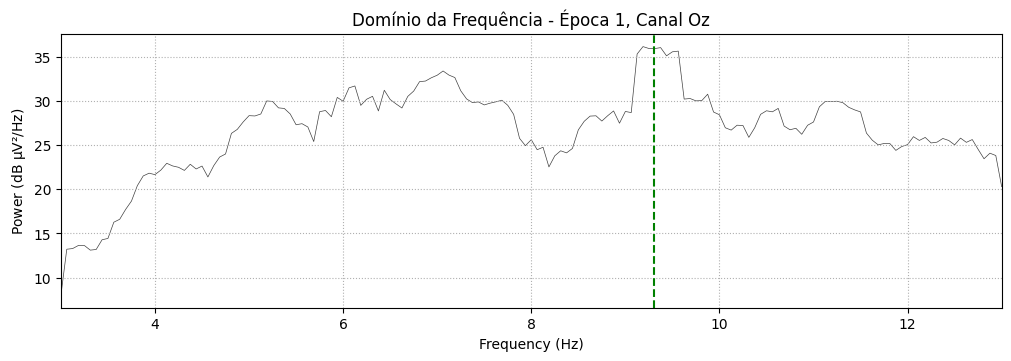

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\eduar\AppData\Local\Temp\ipykernel_19436\542884234.py:16: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  view.plot(show=False)


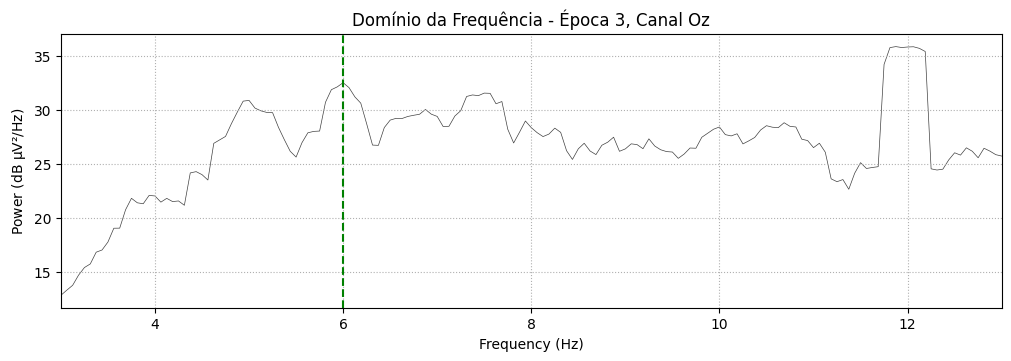

Amostras dos gráficos gerados.


In [42]:
# visualização dos dados
print(epochs)

import matplotlib.pyplot as plt

amostra_epocas = [0, 2] 
amostra_canais = [0, 10]  

max_canais = len(epochs.info['ch_names'])
amostra_canais = [ch for ch in amostra_canais if ch < max_canais]

for i in amostra_epocas:
    for ch_idx in amostra_canais:  
        view = epochs[i].pick_channels([epochs.info['ch_names'][ch_idx]]).compute_psd(method='multitaper', fmin=3, fmax=13, verbose=False)
        
        view.plot(show=False)
        plt.title(f'Domínio da Frequência - Época {i+1}, Canal {epochs.info["ch_names"][ch_idx]}')
        event_value = float(list(epochs[i].event_id.keys())[0])  
        plt.axvline(x=event_value, linestyle='--', color='green')

        plt.show()

print("Amostras dos gráficos gerados.")

*Tarefa*: mostrar os gráficos para o _shape_ `(5, 20, 1, 8192)` solicitado inicialmente.